<h1>6  &nbsp;Estudo comparativo - Soluções numéricas e analítica</h1>

<h2>6.1 &nbsp; Erro absoluto e percentual</h2>

&nbsp; Esta seção tem como objetivo comparar a solução analítica e a aproximação numérica com a população estimada para 2021 pelo IBGE.

&nbsp; Os resultados obtidos pela solução analítica, pelo método de Euler, Euler modificado e RK4:

<center><b>Aproximação populacional para Rio Grande por método</b></center>

| Método | Número de habitantes |
| --- | --- |
| LSODA | 209760.59999083 |
| Euler | 209759.35909435 |
| Euler modificado | 209759.42816025 |
|RK4 |209759.42816037 |
|RK45|  209760.60286601182|

<center>Fonte: O autor</center>

&nbsp; Importando bibliotecas:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

&nbsp; Declarando o nome dos métodos, aproximações e a população estimada pelo IBGE

In [2]:
metodos = ['Analítico','LSODA','Euler','Euler modificado','RK4','RK45']

solucoes = [209761,
            209760.59999083,
            209759.35909435,
            209759.42816025,
            209759.42816037, 
            209760.60286601182]

index = [0,1,2,3,4]

solucao_IBGE = 212881

dados = [[0, 0, 0]]

&nbsp; A seguir, obtemos o erro das soluções obtidas com relação a população fornecida pelo IBGE.

In [3]:
for i in index:
    erro_hab = solucao_IBGE - solucoes[i]
    erro_perc = (erro_hab/solucao_IBGE)*100
    #Adicionando linhas à matriz (tabela)
    dados = np.vstack([dados,[metodos[i],round(erro_hab),str(round(erro_perc,2))+'%']])
                      

  Finalmente, exibimos os dados armazenados:

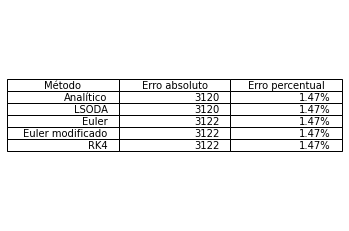

In [4]:
#remove a primeira linha da matriz
dados = np.delete(dados, 0, 0)

#Exibindo tabela
fig, ax =plt.subplots(1,1)
column_labels=['Método', 'Erro absoluto', 'Erro percentual']
ax.axis('tight')
ax.axis('off')
ax.table(cellText=dados,colLabels=column_labels,loc='center')

plt.show()


<h2>6.2  &nbsp; O maior passo de derivação para produzir uma aproximação aceitável</h2>

&nbsp; Vimos que a solução analítica possui uma aproximação aceitável, com erro de 1.47% em relação ao IBGE. &nbsp; Neste tópico, vamos verificar se é possível reduzir o passo de derivação de modo a diminuir o erro dos métodos numéricos estudados neste repositório.
<br><br>
Adicionando o diretório que contém os arquivos python:

In [5]:
import sys 
sys.path.insert(0, '../python')

&nbsp; Importanto os módulos de <i><b>Modelos-Populacionais/python/</b></i> bem como as  bibliotecas Numpy e SciPy:

In [6]:
from menor_passo import menor_passo
#menor_passo(ti,tf,h,decrescimo,P0,sol_IBGE,dados,metodo):

SyntaxError: expected ':' (menor_passo.py, line 64)

<h3>Método de Euler</h3>

&nbsp; Declarando variáveis:


In [ ]:
#Condição inicial
P0 = 186488

#tempo inicial
ti = 0

#tempo final
tf = 21

#passo inicial
h = 0.001

#decrescimo
decrescimo = 0.0001 #adicionar mais um zero à esquerda faz o código demorar

#inicio de tabela de dados
dados = [[0, 0, 0, 0]]

&nbsp; Contruindo algoritmo para minimizar o erro de 14545.

In [ ]:
%%time

dados = menor_passo(ti,tf,h,decrescimo,P0,solucao_IBGE,dados,'Euler','malthus')

<h3>Método de Euler modificado</h3>

In [ ]:
%%time

dados = menor_passo(ti,tf,h,decrescimo,P0,solucao_IBGE,dados,'Euler Modificado','malthus')

<h3>Método de Runge-Kutta de 4º ordem</h3>

In [ ]:
%%time

dados = menor_passo(ti,tf,h,decrescimo,P0,solucao_IBGE,dados,'RK4','malthus')

<h3>Método LSODA</h3>

In [ ]:
%%time

dados = menor_passo(ti,tf,h,decrescimo,P0,solucao_IBGE,dados,'LSODA','malthus')

<h3> Método RK45 </h3>

In [ ]:
%%time

dados = menor_passo(ti,tf,h,decrescimo,P0,solucao_IBGE,dados,'RK45','malthus')

<h3>Resultados</h3>

&nbsp; Exibindo os dados obtidos pelas células anteriores:

In [ ]:
#remove a primeira linha da matriz
dados = np.delete(dados, 0, 0)

#Exibindo tabela
fig, ax =plt.subplots(1,1)
column_labels=['Método', 'Passo','Erro (hab)', 'Erro percentual']
ax.axis('tight')
ax.axis('off')
ax.table(cellText=dados,colLabels=column_labels,loc='center')
print(dados)
plt.show()

&nbsp; Observa-se que a medida que diminuimos o passo de derivação as aproximações obtidas através dos métodos de Euler, Euler modificado e Runge-Kutta de 4º ordem e LSODA permanecem próximas do passo inicial (0.001). &nbsp; Já o método Runge-Kutta 45 obteve um erro de 1.47% em relação à estimativa do IBGE. &nbsp; Cabe salientar que o método RK45 obteve o mesmo erro pencentual pertencente a solução analítica.